Machine Learning (Deep) Application to Portfolio Allocation: Improving Classical Investment Strategies

In [ ]:
#import
import numpy as np
import pandas as pd
import yfinance as yf


In [ ]:
#tickers
#pulling data from 01/2010 to 12/23
tickers = [
    "AAPL",
    "MSFT",
    "GOOG",
    "AMZN",
    "TSLA",
    "TCEHY",
    "NVDA",
    "TSM",
    "META",
    "BABA",
    "ASML",
    "AVGO",
    "ORCL",
    "CSCO",
    "ADBE",
    "CRM",
    "NFLX",
    "TXN",
    "QCOM",
    "SAP",
]
df = pd.DataFrame()
for tick in tickers:
    ydata = yf.download(tick, start="2010-01-01", end="2023-12-31")
    data = ydata["Adj Close"].pct_change()  # Daily returns
    df[tick] = data[1:]
df.index = pd.to_datetime(ydata.index[1:], format="%Y%m%d")
df = df.dropna(axis=1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
#splitting data into train and test
train_size = int(0.8 * df.shape[0])
Y_train = df[: train_size + 1].to_numpy()
Y_test = df[train_size + 1 :].to_numpy()
print("Beginning of training sample: ", df.index[0])
print("End of training sample: ", df.index[train_size])
print("End of test sample: ", df.index[-1])

Beginning of training sample:  2010-01-05 00:00:00
End of training sample:  2021-03-15 00:00:00
End of test sample:  2023-12-29 00:00:00


Modern Portfolio Theory

In [ ]:
#MPT application general implementation

In [ ]:
#MPT using ML/DL models

Factor - based strategies

In [ ]:
#Factor based strategy application general implementation

In [ ]:
#Factor based strategy using ML/DL models

Risk based strategies

In [ ]:
#Risk based strategy application general implementation

In [ ]:
#Risk based strategy using ML/DL models

Combined strategies

In [ ]:
#Combined strategy application general implementation

In [ ]:
#Combined strategy using ML/DL models

[*********************100%%**********************]  5 of 5 completed
Portfolio Returns: 0.2170
Portfolio Volatility: 0.2595
Sharpe Ratio: 0.7590


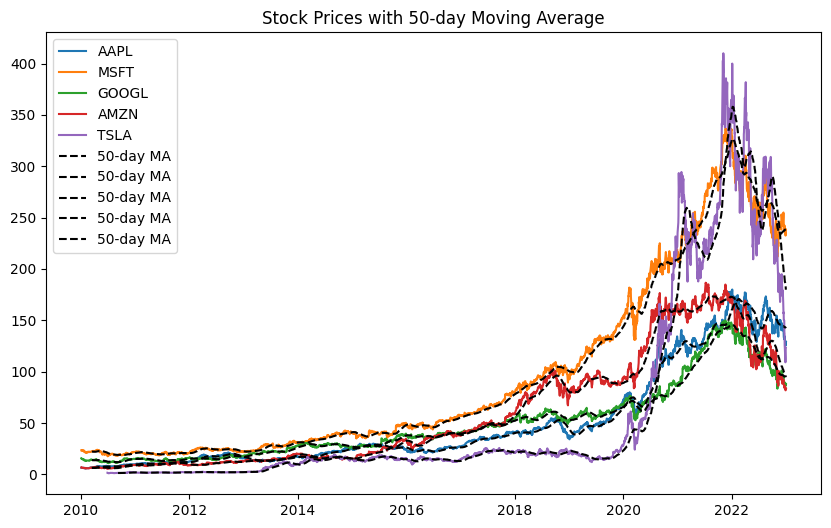

In [1]:
#

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Step 1: Data Retrieval from Yahoo Finance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2010-01-01'
end_date = '2023-01-01'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Step 2: Feature Engineering
returns = data.pct_change()
log_returns = np.log(1 + returns)

# Example: Compute 50-day moving average
ma_50 = data.rolling(window=50).mean()

# Add other features as needed

# Step 3: Portfolio Allocation (Mean-Variance Optimization)
cov_matrix = log_returns.cov()
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # Equal-weight allocation for demonstration

port_returns = np.dot(weights, log_returns.mean() * 252)
port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))

# Step 4: Deep Learning Model (MLP)
num_features = len(tickers)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,), kernel_initializer='he_normal'),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(len(tickers), activation='softmax')
])

# Step 5: Rebalancing, Transactional Costs, Backtesting
# For simplicity, let's assume monthly rebalancing
monthly_returns = data.resample('M').ffill().pct_change()

for i in range(1, len(monthly_returns)):
    # Rebalance portfolio using Mean-Variance Optimization weights
    weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # Equal-weight allocation for demonstration
    new_portfolio_value = np.dot(weights, monthly_returns.iloc[i] + 1)

    # Transaction costs (for simplicity, assume 1% transaction cost)
    transaction_costs = 0.01 * np.abs(new_portfolio_value - np.sum(weights * monthly_returns.iloc[i]))

    # Adjust portfolio value after transaction costs
    new_portfolio_value -= transaction_costs

# Step 6: Evaluation
# Example: Calculate Sharpe ratio
sharpe_ratio = (port_returns - 0.02) / port_volatility  # Assuming a risk-free rate of 2%

# Print results
print(f"Portfolio Returns: {port_returns:.4f}")
print(f"Portfolio Volatility: {port_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Plot 50-day moving average for demonstration
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)

plt.plot(ma_50, label='50-day MA', linestyle='--', color='black')
plt.title('Stock Prices with 50-day Moving Average')
plt.legend()
plt.show()
